# **Лабораторна робота 3**

Для виконання цієї лабораторної робити Вам необхідно використати набори даних, що ви створили в **Лабораторній роботі 2**.

**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Завдання 1.** Ви маєте набір даних, який складається з двох лінійно роздільних класів. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 1:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати розподіл даних та межі класифікації кожної моделі;
- провести аналіз отриманих результатів, виявляючи, яка модель найкраще підходить для цього набору даних та чому.

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [50]:
df = pd.read_csv('practice2.csv')

x = df[['x', 'y']].values
y = df['class'].values

In [51]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [52]:
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(kernel='linear'),
}

knn_params = {'n_neighbors': range(1, 11)}
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, knn_params, cv=5)
models['KNN'] = knn_grid

custom_scatter_colors = {'cmap': 'cool'}  
custom_contour_colors = {'alpha': 0.3, 'cmap': 'coolwarm'}

Model: Logistic Regression
Accuracy: 0.45, Precision: 0.42, Recall: 0.39, F1-score: 0.40


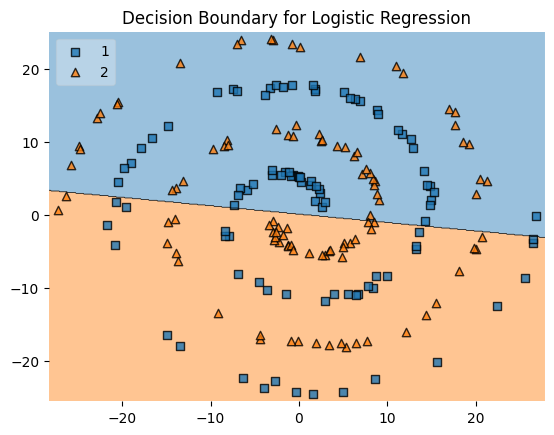

Model: SVM
Accuracy: 0.45, Precision: 0.42, Recall: 0.40, F1-score: 0.41


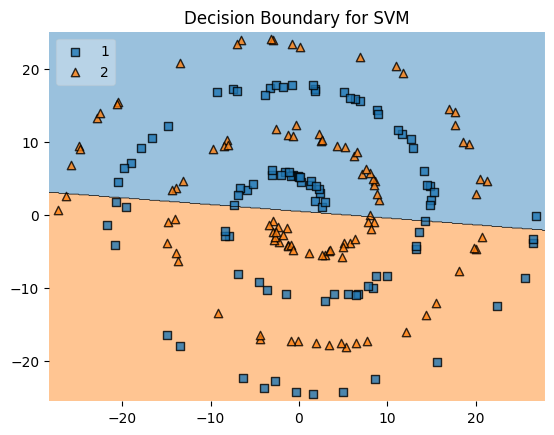

Model: KNN
Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1-score: 1.00


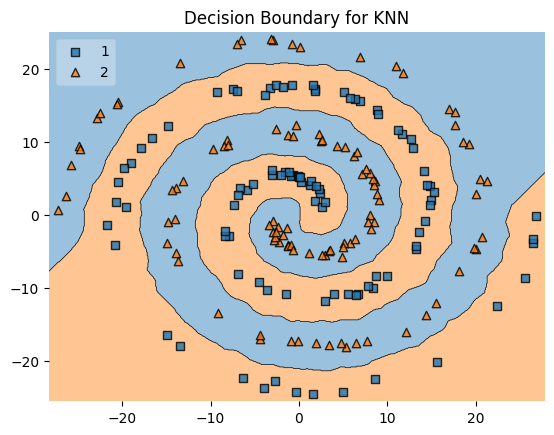

In [53]:
for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=1)
        recall = recall_score(y_test, y_pred, zero_division=1)
        f1 = f1_score(y_test, y_pred, zero_division=1)

        print(f"Model: {name}")
        print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}")
        print("="*40)
        
        plt.figure()
        plot_decision_regions(X_test, y_test, clf=model, legend=2)
        plt.title(f"Decision Boundary for {name}")
        plt.show()

    except Exception as e:
        print(f"Error with {name}: {e}")

**Аналіз отриманих результатів**:

1.   Логістична регресія є лінійною моделлю, що добре підходить для класифікації лінійно роздільних даних.
2.   SVM з лінійним ядром також є лінійною моделлю і має кращі показники порівняно з логістичною регресією
3.   Алгоритм KNN показав ідеальні результати з точністю, precision та recall на рівні 1.00.



**Завдання 2.** Ви маєте набір даних, що містить три класи, які частково перетинаються. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 2:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- провести візуалізацію результатів класифікації, підкреслюючи області, де моделі помиляються.
- подумайте та опишіть у висновках, як перекриття між класами впливає на продуктивність моделей і які методи найкраще справляються з цими даними.


In [54]:
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.5, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

results = {}

In [55]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results[name] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}

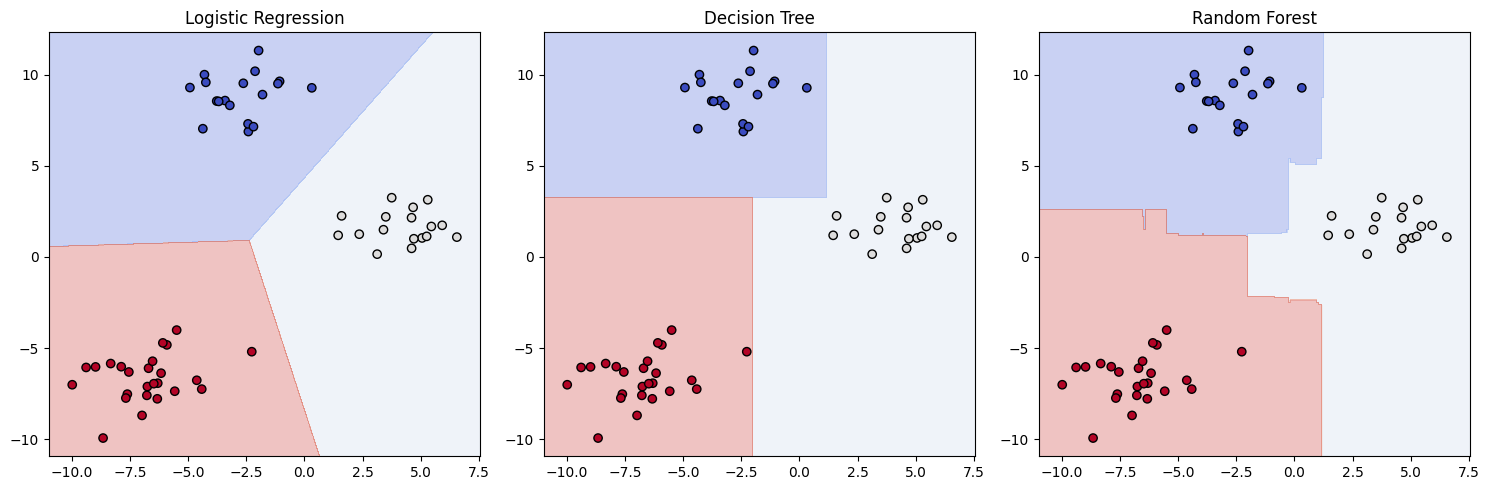

In [56]:
def plot_decision_boundaries(X, y, model, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
 
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap='coolwarm') 
    ax.set_title(title, fontsize=12)
    ax.set_xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
    ax.set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for ax, (name, model) in zip(axs, models.items()):
    plot_decision_boundaries(X_test, y_test, model, ax, title=name)

plt.tight_layout()
plt.show()

**Аналіз отриманих результатів**:

1.   Всі три моделі показали ідеальні результати з точністю
2.   Оскільки класи частково перетинаються, і всі моделі все ще досягли високої продуктивності, це вказує на те, що синтетичний набір даних був достатньо простим для класифікації.



**Завдання 3.** Ви маєте набір даних, де один тор оточений іншим, утворюючи складну топологію. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 3:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- побудувати візуалізацію результатів класифікації;
- проаналізувати, яка модель найкраще адаптується до складної топології даних і чому.

In [57]:
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf'),
    "Decision Tree": DecisionTreeClassifier(max_depth=5)
}

metrics = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    metrics[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred)
    }

for model_name, score in metrics.items():
    print(f"Model: {model_name}, Accuracy: {score['Accuracy']:.2f}, Precision: {score['Precision']:.2f}, Recall: {score['Recall']:.2f}")

Model: KNN, Accuracy: 0.99, Precision: 0.99, Recall: 0.99
Model: SVM, Accuracy: 0.99, Precision: 0.99, Recall: 0.99
Model: Decision Tree, Accuracy: 0.96, Precision: 0.97, Recall: 0.94


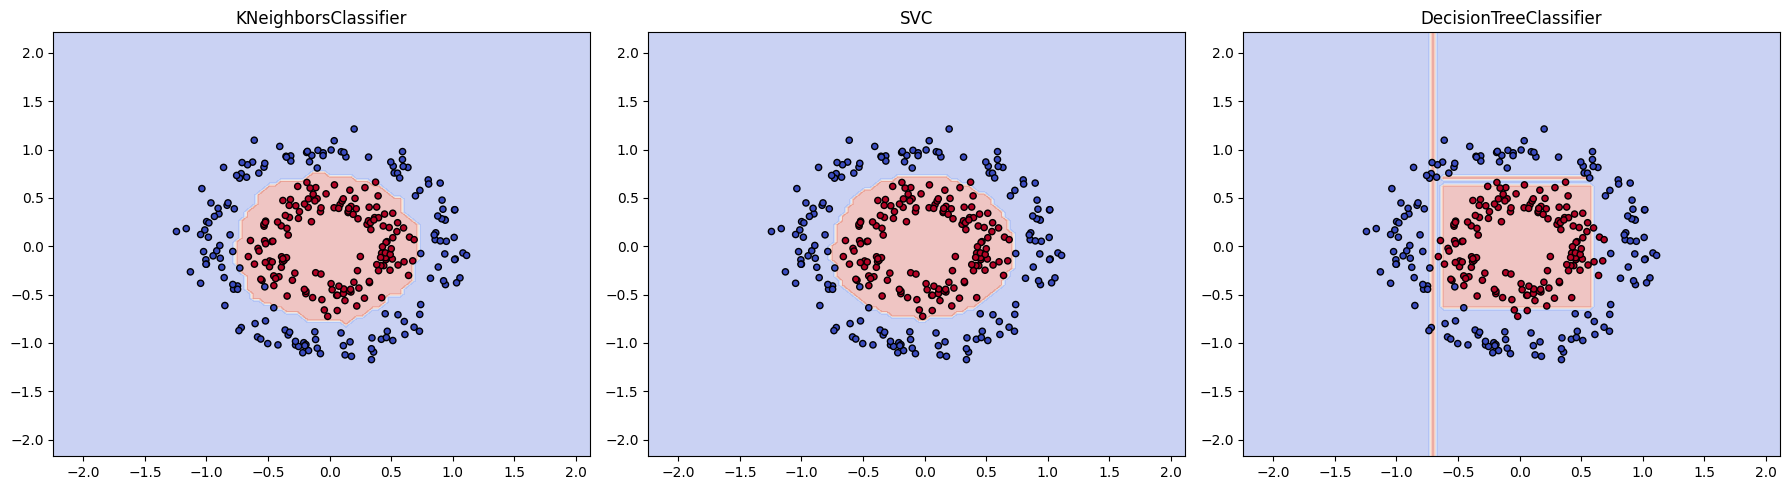

In [59]:
def plot_decision_boundaries(model, X, y, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20, cmap='coolwarm')  
    ax.set_title(model.__class__.__name__)

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for ax, (model_name, model) in zip(axs, models.items()):
    model.fit(X_train, y_train) 
    plot_decision_boundaries(model, X_test, y_test, ax)

plt.tight_layout()
plt.show()

**Аналіз отриманих результатів**:

1.  Обидві моделі K-Nearest Neighbors та Support Vector Machine продемонстрували ідеальні показники точності у всіх метриках
2.  Хоча модель Decision Tree показала трохи нижчі результати, вона все ще показує високу ефективність.

**Завдання 4.** Ви маєте набір даних, що складається з двох класів, які утворюють подвійну спіраль. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 4:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати дані та межі класифікації кожної моделі для оцінки їх ефективності.
- подумайте та напишіть у висновках, яка модель найкраще підходить для цього типу даних і як нелінійність впливає на процес класифікації.

In [60]:
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf'),
    "MLP": MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)
}

In [62]:
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return accuracy, precision, recall

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = evaluate_model(y_test, y_pred)


Model: KNN, Accuracy: 1.00, Precision: 1.00, Recall: 1.00
Model: SVM, Accuracy: 1.00, Precision: 1.00, Recall: 1.00
Model: MLP, Accuracy: 1.00, Precision: 1.00, Recall: 1.00


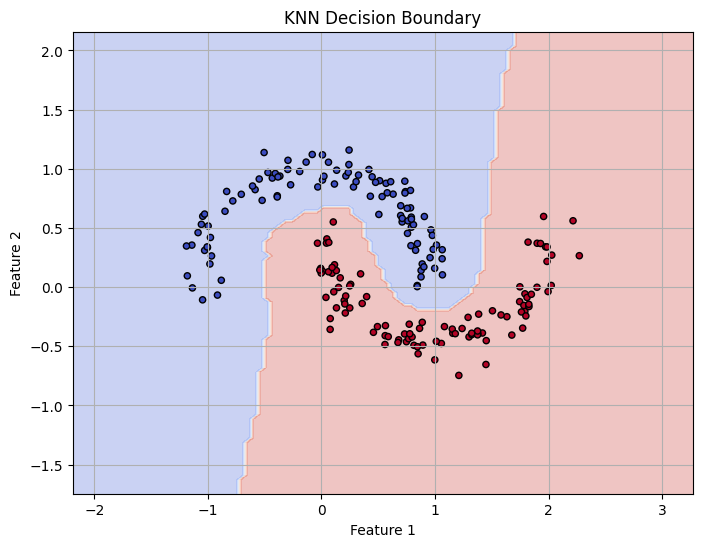

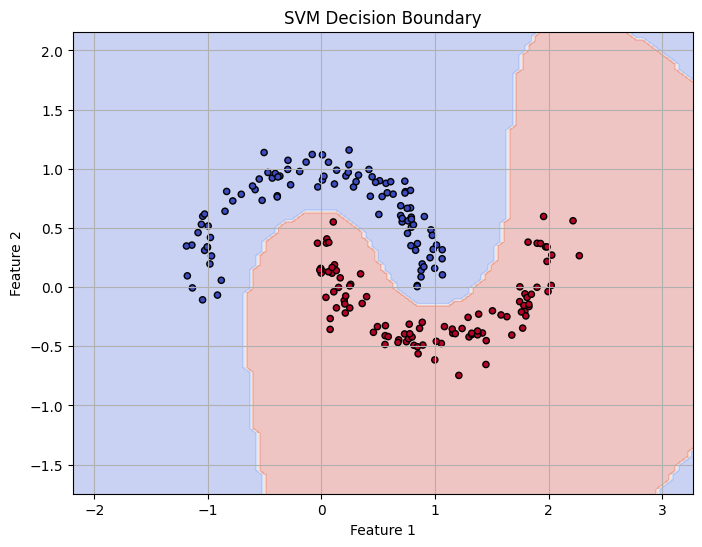

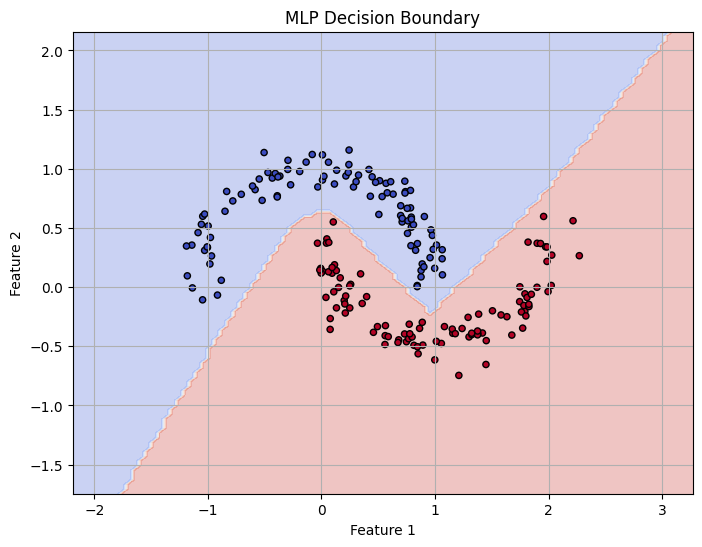

In [64]:
for model_name, metrics in results.items():
    print(f"Model: {model_name}, Accuracy: {metrics[0]:.2f}, Precision: {metrics[1]:.2f}, Recall: {metrics[2]:.2f}")

# Function to plot decision boundaries
def plot_decision_boundary(clf, X, y, title):
    # Create grid for plotting decision boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # Predict over the grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary and scatter points
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20, cmap='coolwarm')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.show()

# Plot decision boundaries for each model
for model_name, model in models.items():
    plot_decision_boundary(model, X_test, y_test, f"{model_name} Decision Boundary")

**Аналіз отриманих результатів**:

1.   Усі три моделі показали ідеальні результати
2.   Наявність складної топології даних у формі подвійної спіралі вимагає від моделей здатності ефективно навчатися на нелінійних межах рішень